## Assignment 2 - Linear Models      
### Author : Sayali Bhagat


# Contents

- <a href='#1'>1. Abstract</a>
    - <a href='#1.1'>1.1 Introduction</a>
    - <a href='#1.2'>1.2 Dataset</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1 Analysis and Interpretations of figures and graphs</a>
    - <a href='#2.2'>2.2 Auditing and cleansing the loaded data</a>
    - <a href='#2.3'>2.3 Encoding of the data as per the requirement</a>
    - <a href='#2.4'>2.4 Data Visualization and Multi-colinearity Check</a>
- <a href='#3'>3. Part A - Linear model</a> 
    - <a href='#3.1'> *Model 1:</a>  
    - <a href='#3.2'> *Model 2:</a>
    - <a href='#3.3'> *Model 3:</a>
- <a href='#4'>4. Part B - Cross Validation on Linear Regression</a> 
- <a href='#5'>5. Part C - Interaction effects</a> 
    - <a href='#5.1'> *Model 1:</a>  
    - <a href='#5.2'> *Model 2:</a>
- <a href='#6'>6. Part E - Regularization</a>

# <a id='1'>1. Abstract</a>

## <a id='1.1'>1.1 Introduction</a>
Washington, D.C. is the capital of the United States. Washington's population is approaching 700,000 people, and has been growing since 2000 following a half-century of population decline. The city is highly segregated and features a high cost of living. In 2017, the average price of a single family home in the district was $649,000. This dataset provides insight on the housing stock of the district.

The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, I'm wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

In this work I'll be analyzing which parameters have the highest influence on price. In the beginning I'll be doing drop down of data to check which are bad and not completely basing on the price column. Will be focusing on regression of various relations and corrected data. And after cleaning the data I'll be analyzing what parameters have highest influence on price

## <a id='1.2'>1.2 Dataset:</a>
* Binary column:
* Categorical column:
* Independent variables:

### <a id='2.1'>2.1 Analysis and Interpretations of figures and graphs</a>



### Importing Libraries:
Python environment comes with number of in-build analytical purpose libraries following are some of the libraries that will be required along with brief description of certain Libraries

In [282]:
# Importing libraries
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Used to make change to a figure (Create, Plot, Decorate)
import seaborn as sns            # Visualization tool
import os
from matplotlib import pyplot
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer
from sklearn.model_selection import KFold
import os
import os,sys
 
path = '.'          #The path is hard-code and '.' indicates current directory
 
files = os.listdir(path)    #Returns the names of the files, directories, symbolic links, etc. in that directory
for name in files:
    print('Filename : '+ name)



Filename : 4-Strings_and_Dictionaries.ipynb
Filename : Countries_of_the_World_EDA_Assignment_1-Sayali_Ashok_Bhagat.ipynb
Filename : Untitled1.ipynb
Filename : attribute_histogram_plots.png
Filename : 2-Print_Statement.ipynb
Filename : .DS_Store
Filename : DC_Properties_1.csv
Filename : 6-Functions.ipynb
Filename : Untitled.ipynb
Filename : 9-Pandas.ipynb
Filename : 8-Matplotlib.ipynb
Filename : DC_Properties.csv
Filename : 5-Control_Flow_Statements.ipynb
Filename : RegularSeasonCompactResults.csv
Filename : Log_ROC.png
Filename : 1-Variable_Operators_and_Built_in_Functions.ipynb
Filename : ward_vs_source.png
Filename : Assignment2_LinearRegression_SayaliBhagat.ipynb
Filename : 3-Lists_Tuples_and_Sets.ipynb
Filename : .ipynb_checkpoints
Filename : .git
Filename : 7-Numpy.ipynb
Filename : Assignment_2_LogisticsRegression_SayaliBhagat.ipynb


#### Source: 
The Dataset is taken from https://www.kaggle.com/christophercorrea/dc-residential-properties which is an open source free machine learning Data set repository.

In [283]:
#Reading into dataframe df
df=pd.read_csv("DC_Properties.csv")
df=df.iloc[:,1:len(df.columns)]
len(df.iloc[:,1])

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


158957

In [284]:
#Lists the top 5 records in the imported csv dataset file
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [285]:
df.info()   # to check datatype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 48 columns):
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null object
GRADE                 106696 non-null

In [286]:
df.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

#### Removing Data for which price is unknown

In [287]:
#Finding percentage null in each column & 
#missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
#print(missing_value)

#Removing rows for which price is null
unknown_data = df[df['PRICE'].isnull()==True]
print(len(unknown_data))
unknown_data.head()

60741


,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,1957,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,1950,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
10,3,0,Forced Air,N,3.0,12,5,1890.0,1950.0,1954,...,-77.040760,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [288]:
#Removing rows for which price is known
df = df[df['PRICE'].isnull()==False]
df.head(2)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


###  <a id='2.2'>2.2 Auditing and cleansing the loaded data</a>

In this task, we are inspecting and auditind the data to identify the data problems, and then fix the problems. Different generic and major data problems could be found in the data might include:
* Lexical errors, e.g., typos and spelling mistakes
* Irregularities, e.g., abnormal data values and data formats
* Violations of the Integrity constraint.
* Outliers
* Duplications
* Missing values
* Inconsistency, e.g., inhomogeneity in values and types in representing the same data

#### 1. Cleaning Dataset

#### 1a) Removing Columns

In [289]:
df.isnull().sum()  # Checking for null values

BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             40316
ROOMS                     0
BEDRM                     0
AYB                     112
YR_RMDL               40542
EYB                       0
STORIES               40349
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                   40316
BLDG_NUM                  0
STYLE                 40316
STRUCT                40316
GRADE                 40316
CNDTN                 40316
EXTWALL               40316
ROOF                  40316
INTWALL               40316
KITCHENS              40317
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             57900
LIVING_GBA            57900
FULLADDRESS           40651
CITY                  40647
STATE                 40647
ZIPCODE             

In [290]:
#Finding percentage null in each column
dc_na = (df.isnull().sum() / len(df)) * 100
dc_na = dc_na.drop(dc_na[dc_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing %' :dc_na})
missing_data.head(20)

,Missing %
LIVING_GBA,58.951698
CMPLX_NUM,58.951698
FULLADDRESS,41.389387
CENSUS_BLOCK,41.385314
NATIONALGRID,41.385314
STATE,41.385314
CITY,41.385314
YR_RMDL,41.278407
STORIES,41.081901
KITCHENS,41.049320


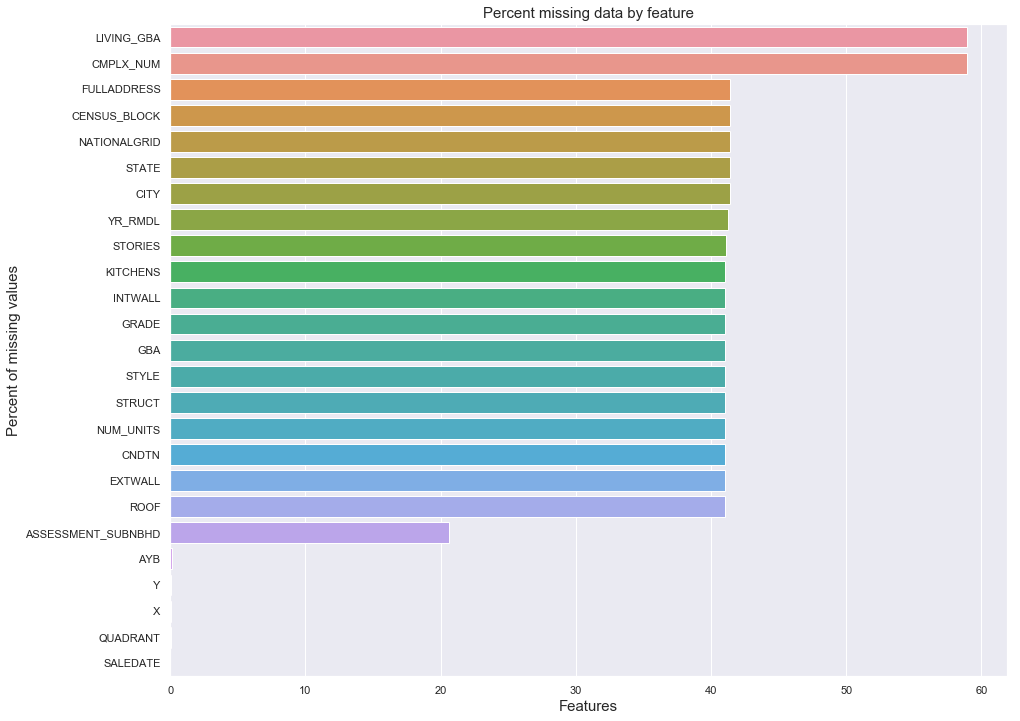

In [291]:
# Plotting the percentile of missing data by features and values
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(y=dc_na.index, x=dc_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [292]:
#Finding percentage null in each column & 
missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
print(missing_value)

#Removing column names with more than 20% missing data
non_null_data=[]
for index in range(0, len(missing_value)):
        if(missing_value[index]<20):
            non_null_data.append(missing_value.index[index])

#Non-null dataframe
df=df[non_null_data]



BATHRM                 0.000000
HF_BATHRM              0.000000
HEAT                   0.000000
AC                     0.000000
NUM_UNITS             41.048302
ROOMS                  0.000000
BEDRM                  0.000000
AYB                    0.114034
YR_RMDL               41.278407
EYB                    0.000000
STORIES               41.081901
SALEDATE               0.001018
PRICE                  0.000000
QUALIFIED              0.000000
SALE_NUM               0.000000
GBA                   41.048302
BLDG_NUM               0.000000
STYLE                 41.048302
STRUCT                41.048302
GRADE                 41.048302
CNDTN                 41.048302
EXTWALL               41.048302
ROOF                  41.048302
INTWALL               41.048302
KITCHENS              41.049320
FIREPLACES             0.000000
USECODE                0.000000
LANDAREA               0.000000
GIS_LAST_MOD_DTTM      0.000000
SOURCE                 0.000000
CMPLX_NUM             58.951698
LIVING_G

#### 1b) Removing Rows:

In [293]:
#Removing rows with null values
df=df.dropna(subset=non_null_data)

#Finding percentage null in each column
missing_value=df.isnull().sum()*100/len(df.iloc[:,1])
print(missing_value)

BATHRM               0.0
HF_BATHRM            0.0
HEAT                 0.0
AC                   0.0
ROOMS                0.0
BEDRM                0.0
AYB                  0.0
EYB                  0.0
SALEDATE             0.0
PRICE                0.0
QUALIFIED            0.0
SALE_NUM             0.0
BLDG_NUM             0.0
FIREPLACES           0.0
USECODE              0.0
LANDAREA             0.0
GIS_LAST_MOD_DTTM    0.0
SOURCE               0.0
ZIPCODE              0.0
LATITUDE             0.0
LONGITUDE            0.0
ASSESSMENT_NBHD      0.0
CENSUS_TRACT         0.0
WARD                 0.0
SQUARE               0.0
X                    0.0
Y                    0.0
QUADRANT             0.0
dtype: float64


#### 1c) Check for duplicate values:

In [294]:
#No. of duplicate data rows
print(len(df))
df.duplicated().sum()

98002


641

In [295]:
#Remove duplicate rows
df=df.drop_duplicates()
len(df)

97361

#### 1d) Modify Datatype:

In [296]:
#Modifying data types
df['EYB']=pd.to_datetime(df['EYB'], format='%Y').dt.year
df['SALEDATE']=pd.to_datetime(df['SALEDATE']).dt.year
df.head(2)
df['AYB']=pd.to_datetime(np.int16(df['AYB']), format='%Y')
df['AYB']=df['AYB'].dt.year

In [297]:
#Drop Columns
df=df.drop(['GIS_LAST_MOD_DTTM'], axis=1)#Single Value Data
df=df.drop(['X','Y'], axis=1)#Repetitive Data
df=df.drop(['BLDG_NUM'],axis=1)#Single Value Data
df=df.drop(['SQUARE'],axis=1)#No trend in data
df=df.drop(['AYB'],axis=1)#No trend
df=df.drop(['CENSUS_TRACT'],axis=1)#Nominal data
df=df.drop(['LATITUDE','LONGITUDE'],axis=1)#Zipcode denotes the location

#### 1e) Reset Index:

In [298]:
df=df.reset_index(drop=True)

#### 1f) Remove Outliers:

In [299]:
df=df[df['FIREPLACES']<200]

In [300]:
#Function to find index no of outliers

def outlierindex(a):
    li=[]
    #find q1
    q1=np.percentile(a, 25)
    #find q2
    q3=np.percentile(a, 75)
    #find iqr
    iqr=q3-q1
    #Outlier range
    #lower fence=q1-1.5iqr
    lf=q1-1.5*iqr
    #upper fence=q3+1.5∗iqr
    uf=q3+1.5*iqr
    #index of outliers
    for i in range(0, len(a)):
        if((a[i]<=lf) or (a[i]>=uf)):
        #print(a[i])
            li.append(i)
    return (li)

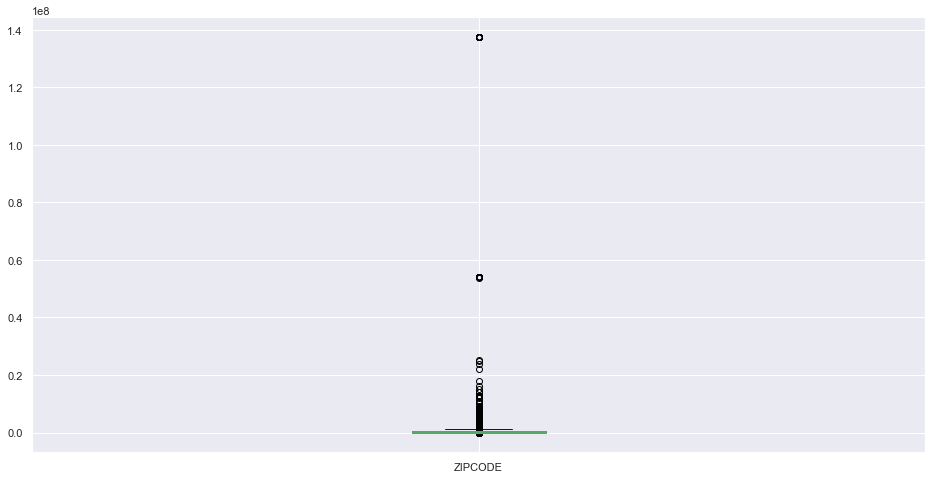

In [301]:
#Plotting boxplot for numeric data
nndf=df.select_dtypes(exclude=['object'])
for i in range(0, len(nndf.columns)):
    nndf[nndf.columns[i]].plot.box()
plt.show()

#### 1g) Encoding Data:

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97355 entries, 0 to 97360
Data columns (total 19 columns):
BATHRM             97355 non-null int64
HF_BATHRM          97355 non-null int64
HEAT               97355 non-null object
AC                 97355 non-null object
ROOMS              97355 non-null int64
BEDRM              97355 non-null int64
EYB                97355 non-null int64
SALEDATE           97355 non-null int64
PRICE              97355 non-null float64
QUALIFIED          97355 non-null object
SALE_NUM           97355 non-null int64
FIREPLACES         97355 non-null int64
USECODE            97355 non-null int64
LANDAREA           97355 non-null int64
SOURCE             97355 non-null object
ZIPCODE            97355 non-null float64
ASSESSMENT_NBHD    97355 non-null object
WARD               97355 non-null object
QUADRANT           97355 non-null object
dtypes: float64(2), int64(10), object(7)
memory usage: 14.9+ MB


In [303]:
df.groupby('QUADRANT')['PRICE'].mean().index

Index(['NE', 'NW', 'SE', 'SW'], dtype='object', name='QUADRANT')

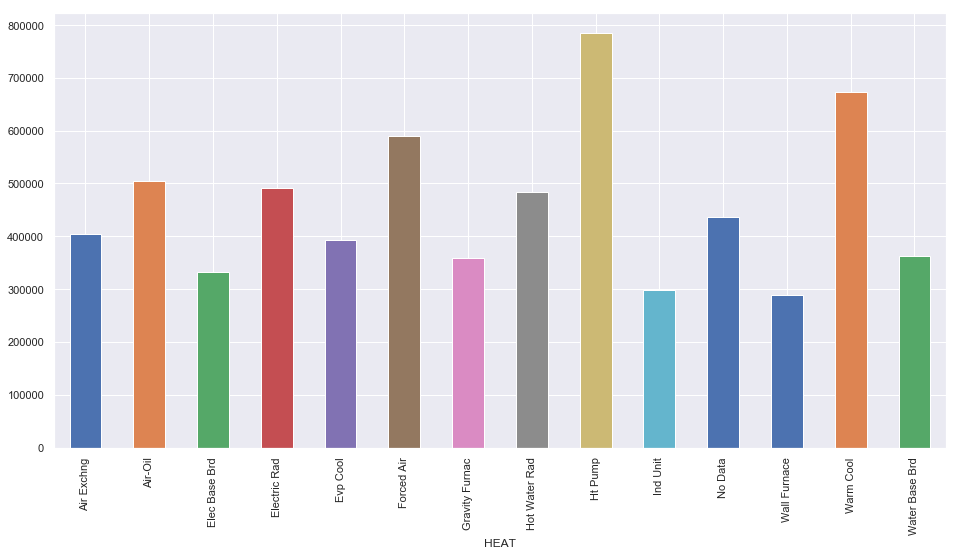

In [304]:
df.groupby('HEAT')['PRICE'].mean().plot.bar()

###  <a id='2.3'>2.3 Encoding of the data as per the requirement</a>

In [305]:
#Converting the HEAT variable into Multi-categorial variable

encoding={'HEAT':{'Air Exchng':1, 'Air-Oil':2, 'Elec Base Brd':1, 'Electric Rad':2, 'Evp Cool':1,
       'Forced Air':2, 'Gravity Furnac':1, 'Hot Water Rad':1, 'Ht Pump':3, 'Ind Unit':1,
       'No Data':0, 'Wall Furnace':1, 'Warm Cool':2, 'Water Base Brd':1}}
df.replace(encoding, inplace=True)

In [306]:
#Converting the AC variable to binary variable
#set '0' in AC column to N in training

df.AC.replace('0', 0, inplace=True)
df.AC.replace('Y', 1, inplace=True)
df.AC.replace('N', 0, inplace = True)

In [307]:
#Converting the QUALIFIED variable to categorial variable

encoding={'QUALIFIED':{'Q':1, 'U':2}}
df.replace(encoding, inplace=True)

In [308]:
#Converting USECODE variable to categorial variable

encoding={'USECODE':{11:1, 12:1, 13:1, 15:1, 16:1, 17:1, 19:2, 23:1, 24:1, 39:2, 116:1, 117:1}}
df.replace(encoding, inplace=True)

In [309]:
#Converting SOURCE variable to categorial variable

encoding={'SOURCE':{'Condominium':2, 'Residential':1}}
df.replace(encoding, inplace=True)

In [310]:
#Converting ZIPCODE varibale to multi-categorial variable

encoding={'ZIPCODE':{20001.0:3, 20002.0:2, 20003.0:3, 20004.0:2, 20005.0:5, 20006.0:1, 20007.0:4,
              20008.0:4, 20009.0:3, 20010.0:3, 20011.0:2, 20012.0:2, 20015.0:4, 20016.0:5,
              20017.0:2, 20018.0:2, 20019.0:1, 20020.0:1, 20024.0:2, 20032.0:1, 20036.0:2,
              20037.0:3, 20052.0:3, 20392.0:2}}
df.replace(encoding, inplace=True)

In [281]:
#Converting ASSESSMENT_NBHD varibale to multi-categorial variable

encoding={'ASSESSMENT_NBHD':{'16th Street Heights':2, 'American University':2, 'Anacostia':1,
       'Barry Farms':1, 'Berkley':4, 'Brentwood':1, 'Brightwood':1, 'Brookland':1,
       'Burleith':2, 'Capitol Hill':2, 'Central-tri 1':2, 'Central-tri 3':4,
       'Chevy Chase':2, 'Chillum':1, 'Cleveland Park':4, 'Colonial Village':2,
       'Columbia Heights':1, 'Congress Heights':1, 'Crestwood':2, 'Deanwood':1,
       'Eckington':1, 'Foggy Bottom':1, 'Forest Hills':2, 'Fort Dupont Park':1,
       'Fort Lincoln':1, 'Foxhall':2, 'Garfield':2, 'Georgetown':3, 'Glover Park':1,
       'Hawthorne':2, 'Hillcrest':1, 'Kalorama':2, 'Kent':3, 'Ledroit Park':2,
       'Lily Ponds':1, 'Marshall Heights':1, 'Massachusetts Avenue Heights':4,
       'Michigan Park':1, 'Mt. Pleasant':2, 'North Cleveland Park':2,
       'Observatory Circle':2, 'Old City 1':2, 'Old City 2':2, 'Palisades':2,
       'Petworth':1, 'Randle Heights':1, 'Riggs Park':1, 'Shepherd Heights':2,
       'Southwest Waterfront':1, 'Spring Valley':3, 'Takoma Park':1, 'Trinidad':1,
       'Wakefield':2, 'Wesley Heights':2, 'Woodley':3, 'Woodridge':1}}
df.replace(encoding, inplace=True)

In [127]:
#Converting WARD varibale to multi-categorial variable

encoding={'WARD':{'Ward 1':2, 'Ward 2':3, 'Ward 3':3, 'Ward 4':2, 'Ward 5':2, 'Ward 6':2, 'Ward 7':1,
       'Ward 8':1}}
df.replace(encoding, inplace=True)

In [128]:
#Converting QUADRANTD varibale to categorial variable

encoding={'QUADRANT':{'NE':1, 'NW':2, 'SE':1, 'SW':1}}
df.replace(encoding, inplace=True)

In [129]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,EYB,SALEDATE,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,SOURCE,ZIPCODE,ASSESSMENT_NBHD,WARD,QUADRANT
0,4,0,2,1,8,4,1972,2003,1095000.0,1,1,5,1,1680,1,3.0,2,3,2
1,3,1,1,1,9,5,1984,2016,2100000.0,1,3,4,1,1680,1,3.0,2,3,2
2,3,1,1,1,8,5,1984,2006,1602000.0,1,1,3,1,1680,1,3.0,2,3,2
3,3,2,1,1,10,5,1972,2010,1950000.0,1,1,4,1,2196,1,3.0,2,3,2
4,3,1,1,1,8,4,1972,2011,1050000.0,1,1,1,1,1627,1,3.0,2,3,2


###  <a id='2.4'>2.4 Data Visualization and Multi-colinearity Check</a>

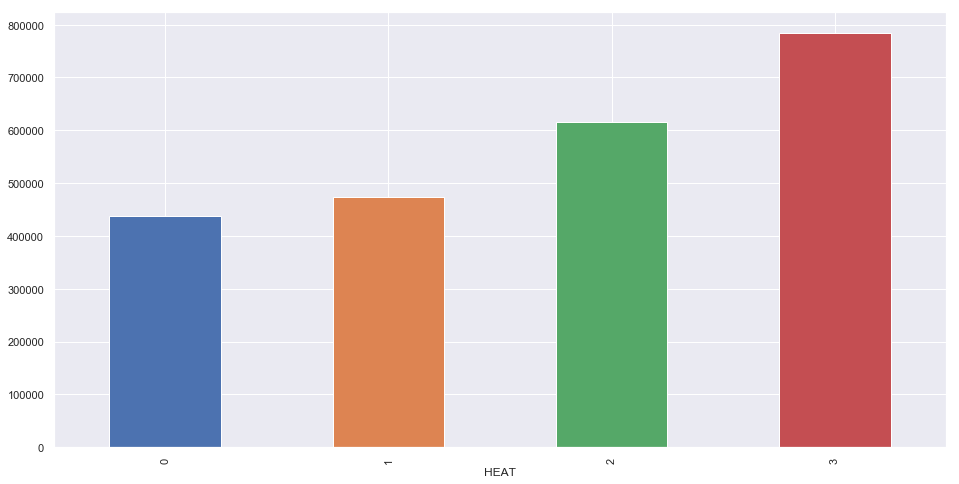

In [130]:
df.groupby('HEAT')['PRICE'].mean().plot.bar()

In [311]:
df['LOGPRICE']=np.log(df['PRICE'])  #To reduce skewness

In [132]:
df['PRICE']

0        1095000.0
1        2100000.0
2        1602000.0
3        1950000.0
4        1050000.0
5        1430000.0
6        1325000.0
7        1240000.0
8         592250.0
9          33232.0
10        907400.0
11       1065000.0
12       1100000.0
13         20000.0
14        703700.0
15       1210000.0
16        130500.0
17        339500.0
18       1050000.0
19       1550000.0
20       1599900.0
21       1700000.0
22       1700000.0
23        450000.0
24        846000.0
25        348500.0
26        849000.0
27       1312000.0
28        390000.0
29        772500.0
           ...    
97331     839000.0
97332     915500.0
97333     880000.0
97334    1120000.0
97335     269000.0
97336     385000.0
97337     632400.0
97338     574000.0
97339     365000.0
97340     405000.0
97341     505000.0
97342     520000.0
97343     499900.0
97344     451000.0
97345     564900.0
97346     660000.0
97347     380000.0
97348     539000.0
97349     908500.0
97350     450000.0
97351     485355.0
97352     32

In [133]:
df['LOGPRICE']

0        13.906265
1        14.557448
2        14.286763
3        14.483340
4        13.864301
5        14.173185
6        14.096923
7        14.030622
8        13.291684
9        10.411269
10       13.718339
11       13.878485
12       13.910821
13        9.903488
14       13.464107
15       14.006131
16       11.779129
17       12.735229
18       13.864301
19       14.253765
20       14.285452
21       14.346139
22       14.346139
23       13.017003
24       13.648275
25       12.761394
26       13.651814
27       14.087063
28       12.873902
29       13.557387
           ...    
97331    13.639966
97332    13.727226
97333    13.687677
97334    13.928839
97335    12.502467
97336    12.860999
97337    13.357277
97338    13.260385
97339    12.807653
97340    12.911642
97341    13.132314
97342    13.161584
97343    13.122163
97344    13.019223
97345    13.244404
97346    13.399995
97347    12.847927
97348    13.197471
97349    13.719550
97350    13.017003
97351    13.092636
97352    12.

Nothing looks particularly out of place that is there are no empty values/negitive values etc and data cleaning is done 

### Multicolinearity:

**Spearman correlation is used as there are ordinal data present in the dataset.
Checking the correlation between different factors by plotting heat maps**

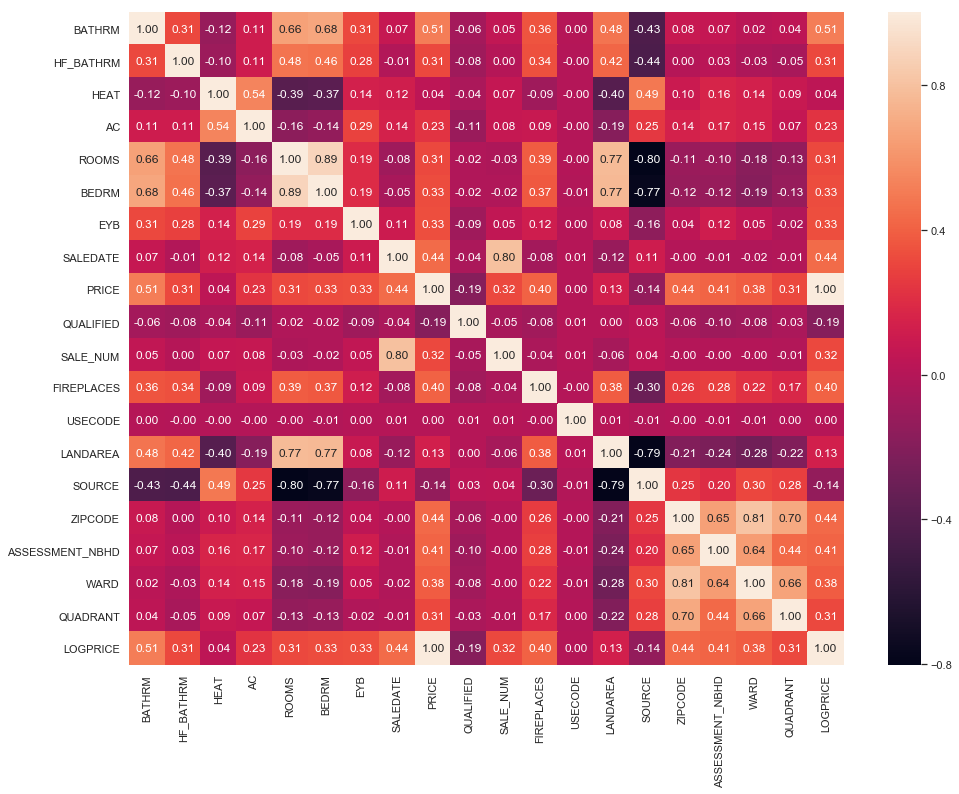

In [134]:
corrmat = df.corr()
# Plotting heatmaps to check for factors that affect the most to GDP
plt.figure(figsize=(16,12))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(df.corr(method='spearman'),   # iloc-> primary integer position
            annot=True,                   # annot-> numerical representation
            fmt='.2f')                    # String formatting code to use when adding annotations(fmt='.2f' -> till 2 decimals))           



**Correlation between the variable:**
* ROOMS and BEDRM are highly correlated to eachother
* LANDAREA is highly correalted to ROOMS and BEDRM
* ZIPCODE is highly correlated to WARD
* ZIPCODE and WARD are highly correlated to QUADRANT
* ASSESSMENT_NBHD is correlated to ZIPCODE and WARD



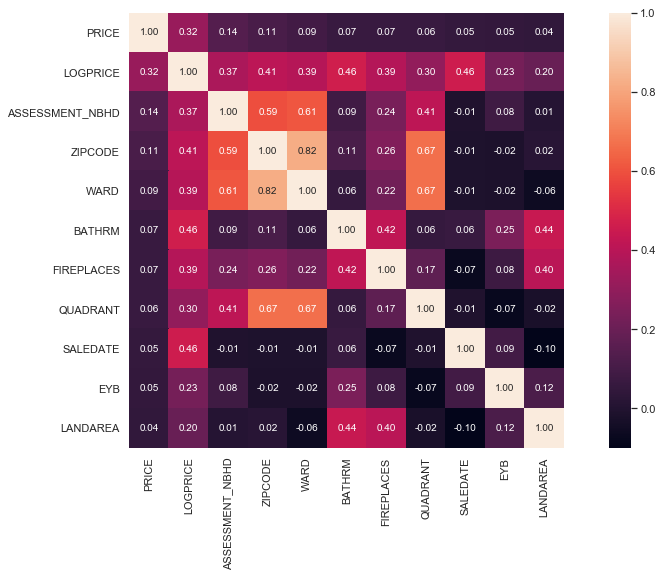

In [135]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [136]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,PRICE
1,LOGPRICE
2,ASSESSMENT_NBHD
3,ZIPCODE
4,WARD
5,BATHRM
6,FIREPLACES
7,QUADRANT
8,SALEDATE
9,EYB


The above are the list of Top Variables (Independent Factors) with postive correlation to the house price that contribute to the Price of the house

We found that Bedroom, Rooms and LandArea are strongly correlated and negatively correlated with Source
And Sale_Num and Sale Date are strongly correlated
And ZipCode and Ward ar strongly correlated

**Plotting histogram plot with help of matplotlib to plot the regression between different features and target for better selection of parameters**

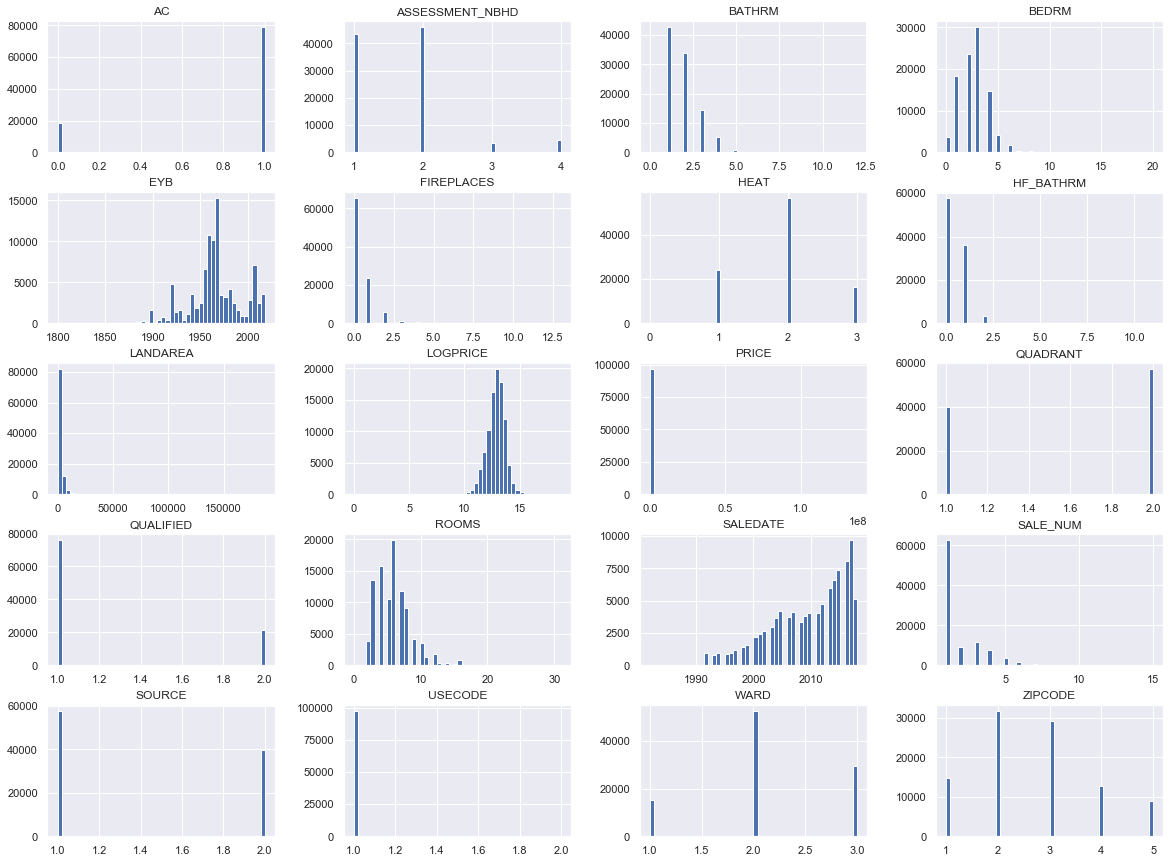

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

###  <a id='3'>3. Part A - Linear model</a>

Linear regression is a statistical model that examines the linear relationship between two (Simple Linear Regression) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too

###  <a id='3.1'> *Model 1:</a>  

The data is split into training data and testing data, which is fit into the model the model predicts certain output based on training data which is then tested against the target data.

We will be using mean squared error to check the accuracy of the predictions
General steps to calculate the mean squared error from a set of X and Y values:
* Find the regression line
* Insert your X values into the linear regression equation to find the new Y values (Y’)
* Subtract the new Y value from the original to get the error
* Square the errors
* Add up the errors
* Find the mean

In [138]:
ndf=df

In [139]:
#Considering all the variables except PRICE and LOGPRICE

X=ndf.drop(['PRICE','LOGPRICE'], axis=1)  
Y=ndf['LOGPRICE']

#### A) Splitting dataset in 80% train data and 25% test data

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8 ,
                                                    random_state=100)
Y_train.shape

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(77884,)

In [141]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
print(lm.intercept_)
print(lm.coef_)

-117.99639177957069
[ 1.42878520e-01  1.38011531e-01 -5.01265546e-05  1.22537075e-01
  5.55822103e-03  8.55330336e-02  1.83717224e-03  6.29556997e-02
 -2.23642501e-01 -4.32570957e-02  1.37784583e-01 -6.61283951e-01
 -3.65408469e-06 -7.09224169e-02  8.44101658e-02  1.39604200e-01
  2.15043123e-01  1.09120482e-01]


In [143]:
prediction = lm.predict(X_test)

In [144]:
prediction

array([12.96057662, 12.78974515, 12.76897625, ..., 12.79030163,
       12.2691105 , 13.20931553])

In [145]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'Y_test':Q_test, 'Y_pred' :prediction}), ignore_index=True)
regression_predicted.head(20)

,Y_test,Y_pred
0,13.206705,12.960577
1,12.721886,12.789745
2,12.765688,12.768976
3,13.315864,12.967642
4,12.840000,12.512464
5,13.392391,12.946533
6,11.951180,11.907313
7,13.955273,14.565139
8,13.584839,13.142388
9,12.936034,12.749904


In [146]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
BATHRM,0.142879
HF_BATHRM,0.138012
HEAT,-0.000050
AC,0.122537
ROOMS,0.005558
BEDRM,0.085533
EYB,0.001837
SALEDATE,0.062956
QUALIFIED,-0.223643
SALE_NUM,-0.043257


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


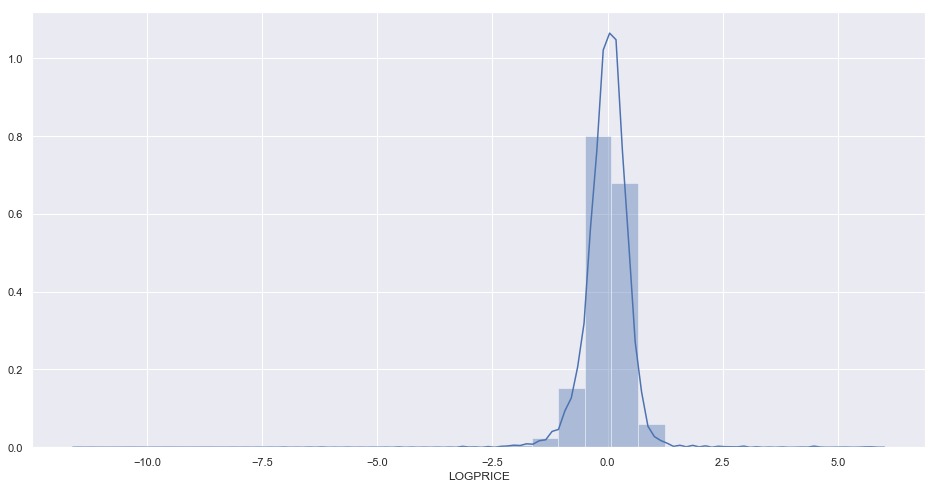

In [147]:
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot((Y_test-prediction), bins = 30)

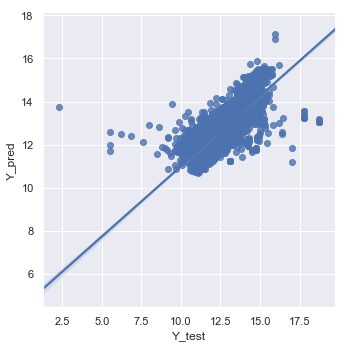

In [148]:
sns.lmplot(x='Y_test', y='Y_pred', data = regression_predicted)

In [149]:
metrics.explained_variance_score(Y_test,prediction)

0.641566491729203

#### B) Test Model on Train Data

In [150]:
Y_pred = lm.predict(X_train)

In [151]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_train, Y_pred)
r_squared = r2_score(Y_train, Y_pred)

# Calculating the errors for the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

MAE: 0.3308186503795677
MSE: 0.2541358731760198
RMSE: 0.5041189077747629


In [152]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.2541358731760198
r_square_value : 0.6403822081693


In [153]:
nndf=pd.DataFrame(Y_train)
nndf['PRED']=Y_pred
nndf=nndf.reset_index(drop=True)

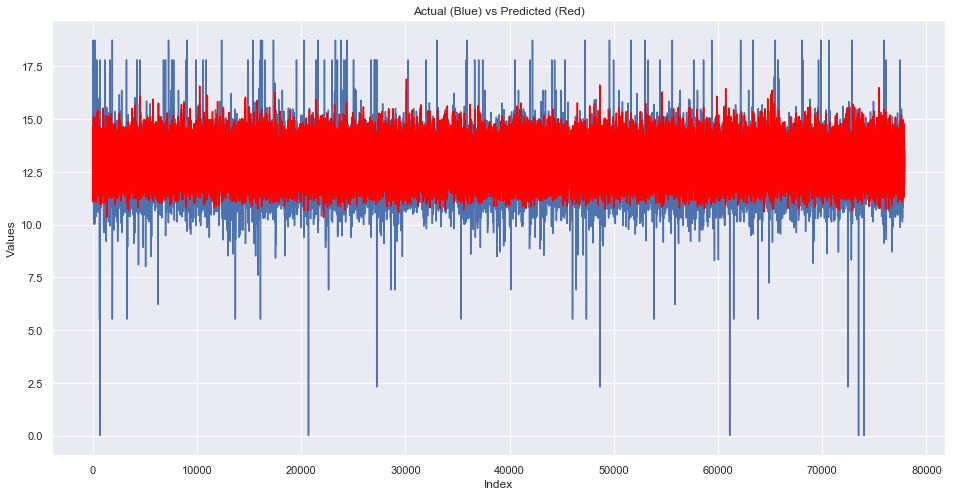

In [154]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

In [155]:
import statsmodels.api as sm

X_train_sm = X_train 
X_train_sm = sm.add_constant(X_train_sm)

lm_sm = sm.OLS(Y_train,X_train_sm).fit()

lm_sm.params

const             -117.996392
BATHRM               0.142879
HF_BATHRM            0.138012
HEAT                -0.000050
AC                   0.122537
ROOMS                0.005558
BEDRM                0.085533
EYB                  0.001837
SALEDATE             0.062956
QUALIFIED           -0.223643
SALE_NUM            -0.043257
FIREPLACES           0.137785
USECODE             -0.661284
LANDAREA            -0.000004
SOURCE              -0.070922
ZIPCODE              0.084410
ASSESSMENT_NBHD      0.139604
WARD                 0.215043
QUADRANT             0.109120
dtype: float64

In [156]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               LOGPRICE   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     7703.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:22:00   Log-Likelihood:                -57166.
No. Observations:               77884   AIC:                         1.144e+05
Df Residuals:                   77865   BIC:                         1.145e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -117.9964      0.743   -1

In [157]:
lm_sm.pvalues

const               0.000000e+00
BATHRM              0.000000e+00
HF_BATHRM          3.763078e-296
HEAT                9.891907e-01
AC                  1.450328e-98
ROOMS               1.323585e-04
BEDRM              6.385909e-207
EYB                1.917660e-144
SALEDATE            0.000000e+00
QUALIFIED           0.000000e+00
SALE_NUM           1.030166e-154
FIREPLACES          0.000000e+00
USECODE             1.434204e-03
LANDAREA            5.716532e-06
SOURCE              7.656876e-28
ZIPCODE            2.993474e-177
ASSESSMENT_NBHD     0.000000e+00
WARD                0.000000e+00
QUADRANT            3.854401e-96
dtype: float64

In [158]:
lm_sm.rsquared

0.6403822081692971

#### C) Test Model on Test Data

In [159]:
Y_pred = lm.predict(X_test)

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [161]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.24645815050516817
r_square_value : 0.6415597373970985


In [162]:
nndf=pd.DataFrame(Y_test)
nndf['PRED']=Y_pred
nndf=nndf.reset_index(drop=True)

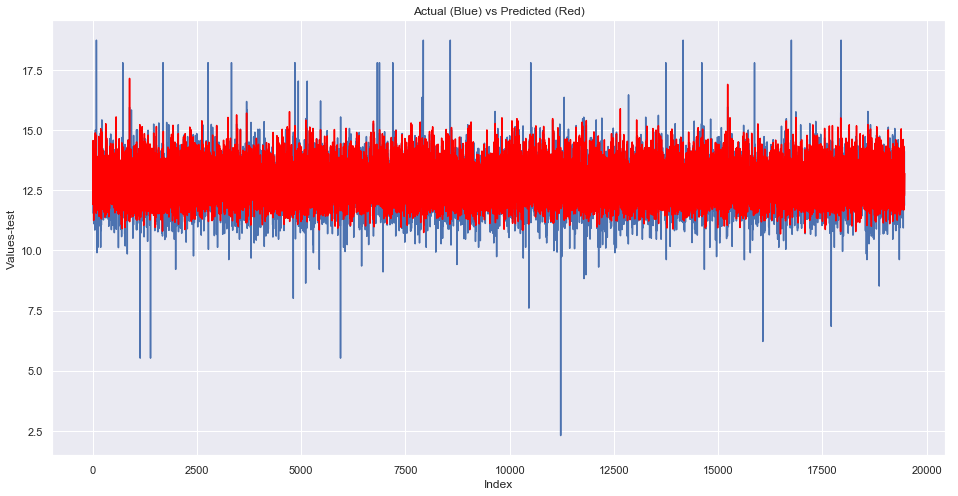

In [163]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values-test')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

Text(0, 0.5, 'Predicted Y')

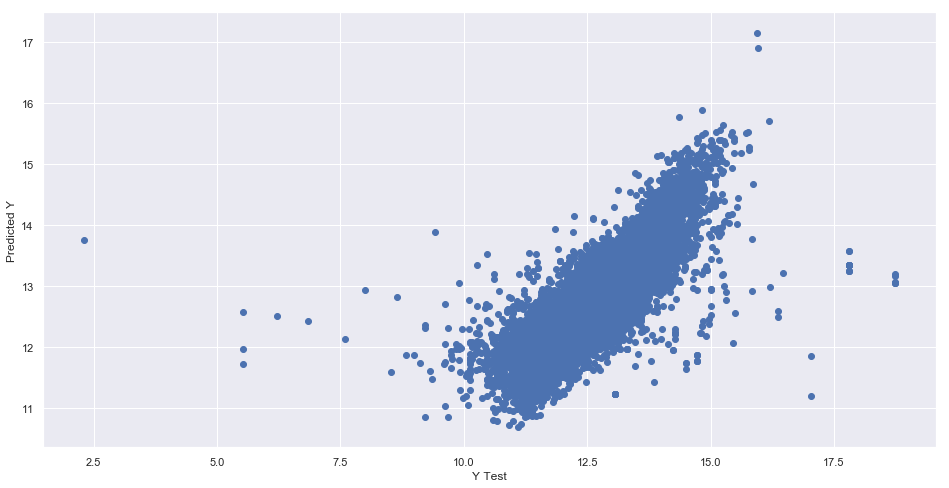

In [164]:
plt.scatter(nndf['LOGPRICE'],nndf['PRED'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

* The model worked perfectly fine since the mean square error is so close to 0 we can say that this is a good model and R square value is near to 1
* You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance for this reason we need to validate the model
* This process of deciding whether the numerical results quantifying hypothesized relationships between variables, are acceptable as descriptions of the data, is known as validation

###  <a id='3.2'> *Model 2:</a>  

### A) Maximum correlation variables: 
In this model have used the random features based on correlation as training data and LOGPRICE as target data

In [165]:
A=ndf[['ASSESSMENT_NBHD','ZIPCODE','WARD','BATHRM','FIREPLACES','SALEDATE','EYB','LANDAREA','QUADRANT']]  #1 col
B=ndf['LOGPRICE']

In [166]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, train_size=0.8 ,
                                                    random_state=100)
B_test.shape

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(19471,)

In [167]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(A_train,B_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
print(lm.intercept_)
print(lm.coef_)

-108.79622037145649
[1.30136337e-01 8.58855426e-02 1.85297970e-01 2.45166492e-01
 1.95738737e-01 5.68636707e-02 2.96754279e-03 1.01125866e-05
 7.98506830e-02]


In [169]:
prediction = lm.predict(A_test)

In [170]:
prediction

array([13.18307632, 12.7114521 , 12.80072661, ..., 12.75378761,
       12.36025966, 13.20346577])

In [171]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'B_test':B_test, 'B_pred' :prediction}), ignore_index=True)
regression_predicted.head(20)

,B_test,B_pred
0,13.206705,13.183076
1,12.721886,12.711452
2,12.765688,12.800727
3,13.315864,13.244919
4,12.840000,12.318981
5,13.392391,13.091260
6,11.951180,11.854074
7,13.955273,14.452759
8,13.584839,13.150727
9,12.936034,12.417327


In [172]:
coeff_df = pd.DataFrame(lm.coef_,A_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
ASSESSMENT_NBHD,0.130136
ZIPCODE,0.085886
WARD,0.185298
BATHRM,0.245166
FIREPLACES,0.195739
SALEDATE,0.056864
EYB,0.002968
LANDAREA,0.000010
QUADRANT,0.079851


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


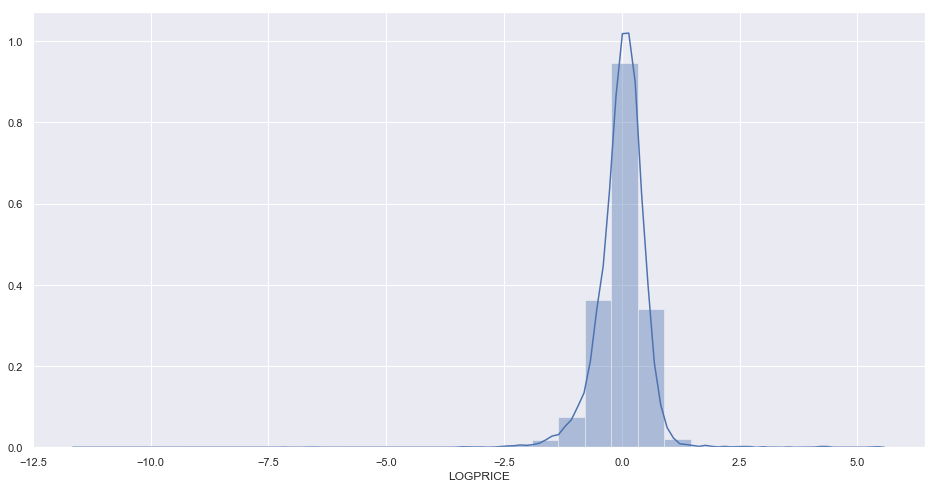

In [173]:
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot((B_test-prediction), bins = 30)

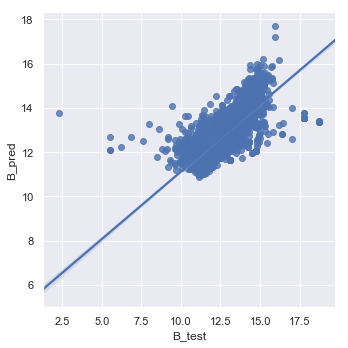

In [174]:
sns.lmplot(x='B_test', y='B_pred', data = regression_predicted)

In [175]:
metrics.explained_variance_score(B_test, prediction)

0.6020409147224473

#### B) Test Model on Train Data

In [176]:
B_pred = lm.predict(A_train)

In [177]:
B_pred

array([12.76032133, 13.07807963, 12.77981832, ..., 12.77896767,
       11.69891099, 12.45053522])

In [178]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(B_train, B_pred)
r_squared = r2_score(B_train, B_pred)

# Calculating the errors for the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(B_train, B_pred))
print('MSE:', metrics.mean_squared_error(B_train, B_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(B_train, B_pred)))

MAE: 0.35717874575441294
MSE: 0.28423278834914706
RMSE: 0.5331348688175883


In [179]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.28423278834914706
r_square_value : 0.5977932338532679


In [180]:
nndf=pd.DataFrame(B_train)
nndf['PRED']=B_pred
nndf=nndf.reset_index(drop=True)



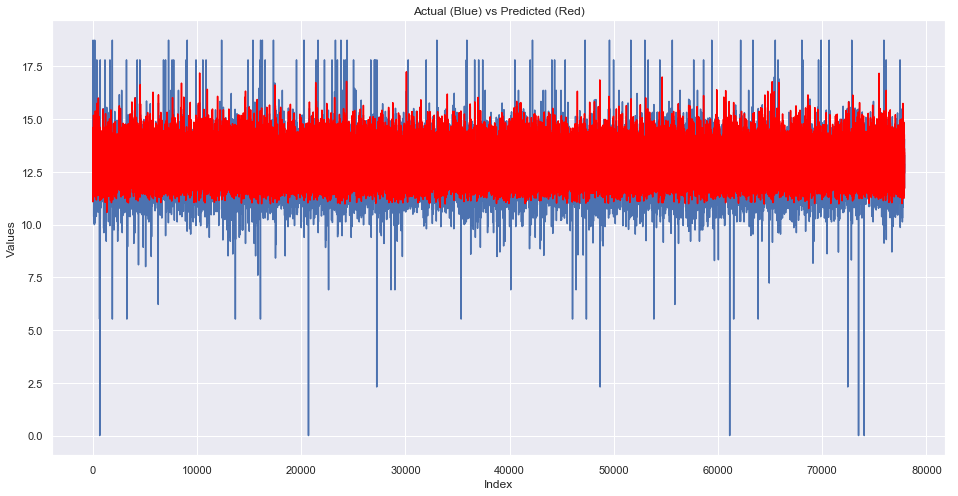

In [181]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

In [182]:
import statsmodels.api as sm

A_train_sm = A_train 
A_train_sm = sm.add_constant(A_train_sm)

lm_sm = sm.OLS(B_train,A_train_sm).fit()

lm_sm.params

const             -108.796220
ASSESSMENT_NBHD      0.130136
ZIPCODE              0.085886
WARD                 0.185298
BATHRM               0.245166
FIREPLACES           0.195739
SALEDATE             0.056864
EYB                  0.002968
LANDAREA             0.000010
QUADRANT             0.079851
dtype: float64

In [183]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               LOGPRICE   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:22:09   Log-Likelihood:                -61525.
No. Observations:               77884   AIC:                         1.231e+05
Df Residuals:                   77874   BIC:                         1.232e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -108.7962      0.596   -1

In [184]:
print('Parameters: ', lm_sm.params)
print('R2: ', lm_sm.rsquared)


Parameters:  const             -108.796220
ASSESSMENT_NBHD      0.130136
ZIPCODE              0.085886
WARD                 0.185298
BATHRM               0.245166
FIREPLACES           0.195739
SALEDATE             0.056864
EYB                  0.002968
LANDAREA             0.000010
QUADRANT             0.079851
dtype: float64
R2:  0.597793233853269


In [185]:
lm_sm.pvalues

const               0.000000e+00
ASSESSMENT_NBHD     0.000000e+00
ZIPCODE            1.628626e-165
WARD               1.066445e-245
BATHRM              0.000000e+00
FIREPLACES          0.000000e+00
SALEDATE            0.000000e+00
EYB                 0.000000e+00
LANDAREA            2.947188e-36
QUADRANT            1.645874e-48
dtype: float64

### C) Test Model on Test Data

In [186]:
B_pred = lm.predict(A_test)

In [187]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(B_test, B_pred)
r_squared = r2_score(B_test, B_pred)

In [188]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.273631557147473
r_square_value : 0.602039668806472


In [189]:
nndf=pd.DataFrame(B_test)
nndf['PRED']=B_pred
nndf=nndf.reset_index(drop=True)

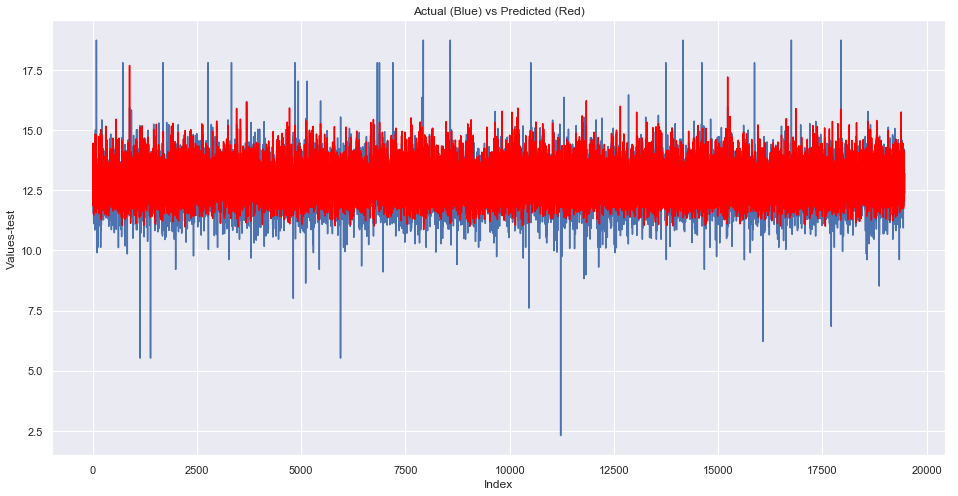

In [190]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values-test')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

Text(0, 0.5, 'Predicted B')

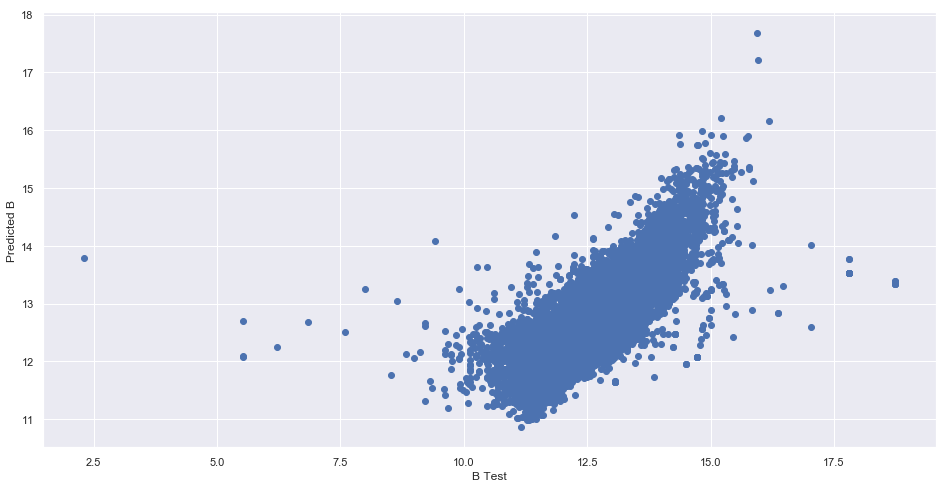

In [191]:
plt.scatter(nndf['LOGPRICE'],nndf['PRED'])
plt.xlabel('B Test')
plt.ylabel('Predicted B')

#### This model isn't that good compared to the first one as some variables have p values more than 0.05 which are supposed to be dropped as per the null hypothesis

###  <a id='3.3'> *Model 3:</a>  

#### A) Considering the variables having p values as 0 and highly correlated

In [192]:
P=ndf[['ASSESSMENT_NBHD','HF_BATHRM','SALE_NUM','SALEDATE','ROOMS','BEDRM','AC','BATHRM','ZIPCODE','WARD','QUALIFIED','EYB','QUADRANT','FIREPLACES']]  #1 col
Q=ndf['LOGPRICE']

In [193]:
# from sklearn.model_selection import train_test_split
P_train, P_test, Q_train, Q_test = train_test_split(P, Q, train_size=0.8 ,
                                                    random_state=100)
P_test.shape

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(19471, 14)

In [194]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(P_train,Q_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
print(lm.intercept_)
print(lm.coef_)

-118.1884931949276
[ 0.13725966  0.14520893 -0.04166706  0.06257206  0.00906509  0.09362372
  0.10992005  0.13692908  0.08456319  0.21176951 -0.22812123  0.00193766
  0.09992687  0.13881118]


In [196]:
prediction = lm.predict(P_test)

In [197]:
prediction

array([12.95117947, 12.8225728 , 12.77840114, ..., 12.78996485,
       12.26374289, 13.20141986])

In [198]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'Q_test':Q_test, 'Q_pred' :prediction}), ignore_index=True)
regression_predicted.head(20)

,Q_test,Q_pred
0,13.206705,12.951179
1,12.721886,12.822573
2,12.765688,12.778401
3,13.315864,12.972220
4,12.840000,12.509054
5,13.392391,12.942352
6,11.951180,11.899205
7,13.955273,14.583840
8,13.584839,13.152882
9,12.936034,12.736393


In [199]:
coeff_df = pd.DataFrame(lm.coef_,P_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
ASSESSMENT_NBHD,0.137260
HF_BATHRM,0.145209
SALE_NUM,-0.041667
SALEDATE,0.062572
ROOMS,0.009065
BEDRM,0.093624
AC,0.109920
BATHRM,0.136929
ZIPCODE,0.084563
WARD,0.211770


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


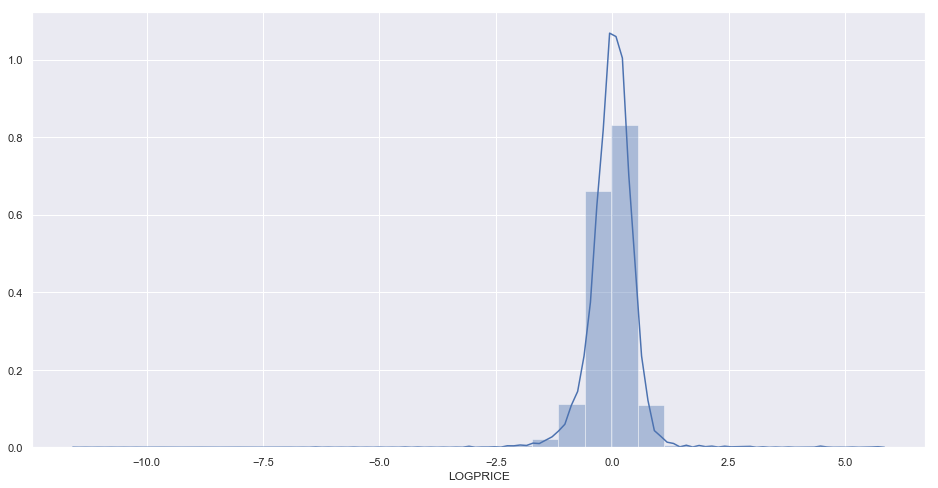

In [200]:
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot((Q_test-prediction), bins = 30)

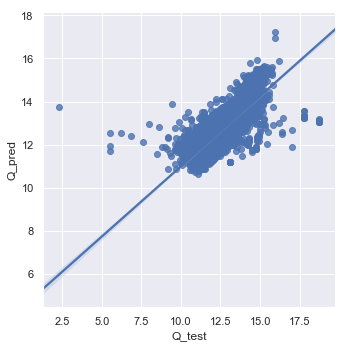

In [201]:
sns.lmplot(x='Q_test', y='Q_pred', data = regression_predicted)

### B) The model on train data

In [202]:
Q_pred = lm.predict(P_train)

In [203]:
Q_pred

array([12.33324628, 12.9910602 , 12.96873341, ..., 12.6202087 ,
       11.9367699 , 12.65422218])

In [204]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Q_train, Q_pred)
r_squared = r2_score(Q_train, Q_pred)

# Calculating the errors for the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Q_train, Q_pred))
print('MSE:', metrics.mean_squared_error(Q_train, Q_pred))
rmse_linear=np.sqrt(metrics.mean_squared_error(Q_train, Q_pred))
print ('RMSE:', rmse_linear)

MAE: 0.3311795268081589
MSE: 0.25464203434558075
RMSE: 0.5046206836283871


In [205]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.25464203434558075
r_square_value : 0.6396659591807841


In [206]:
nndf=pd.DataFrame(Q_train)
nndf['PRED']=Q_pred
nndf=nndf.reset_index(drop=True)

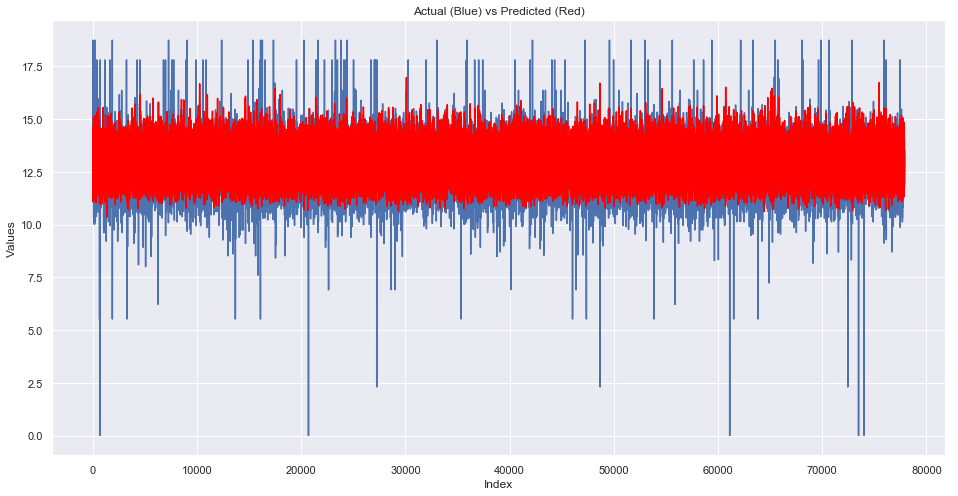

In [207]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

In [208]:
import statsmodels.api as sm

P_train_sm = P_train 
P_train_sm = sm.add_constant(P_train_sm)

lm_sm = sm.OLS(Q_train,P_train_sm).fit()

lm_sm.params

const             -118.188493
ASSESSMENT_NBHD      0.137260
HF_BATHRM            0.145209
SALE_NUM            -0.041667
SALEDATE             0.062572
ROOMS                0.009065
BEDRM                0.093624
AC                   0.109920
BATHRM               0.136929
ZIPCODE              0.084563
WARD                 0.211770
QUALIFIED           -0.228121
EYB                  0.001938
QUADRANT             0.099927
FIREPLACES           0.138811
dtype: float64

In [209]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               LOGPRICE   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     9874.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:22:30   Log-Likelihood:                -57244.
No. Observations:               77884   AIC:                         1.145e+05
Df Residuals:                   77869   BIC:                         1.147e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -118.1885      0.712   -1

In [210]:
lm_sm.pvalues

const               0.000000e+00
ASSESSMENT_NBHD     0.000000e+00
HF_BATHRM           0.000000e+00
SALE_NUM           1.652401e-144
SALEDATE            0.000000e+00
ROOMS               1.182503e-10
BEDRM              1.362857e-270
AC                 2.401157e-101
BATHRM              0.000000e+00
ZIPCODE            6.466396e-179
WARD                0.000000e+00
QUALIFIED           0.000000e+00
EYB                1.955876e-163
QUADRANT            1.119215e-82
FIREPLACES          0.000000e+00
dtype: float64

In [211]:
lm_sm.rsquared

0.639665959180785

### C) test model on test data

In [212]:
Q_pred = lm.predict(P_test)

In [213]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Q_test, Q_pred)
r_squared = r2_score(Q_test, Q_pred)

In [214]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.24615327915031415
r_square_value : 0.6420031318162727


In [215]:
nndf=pd.DataFrame(Q_test)
nndf['PRED']=Q_pred
nndf=nndf.reset_index(drop=True)

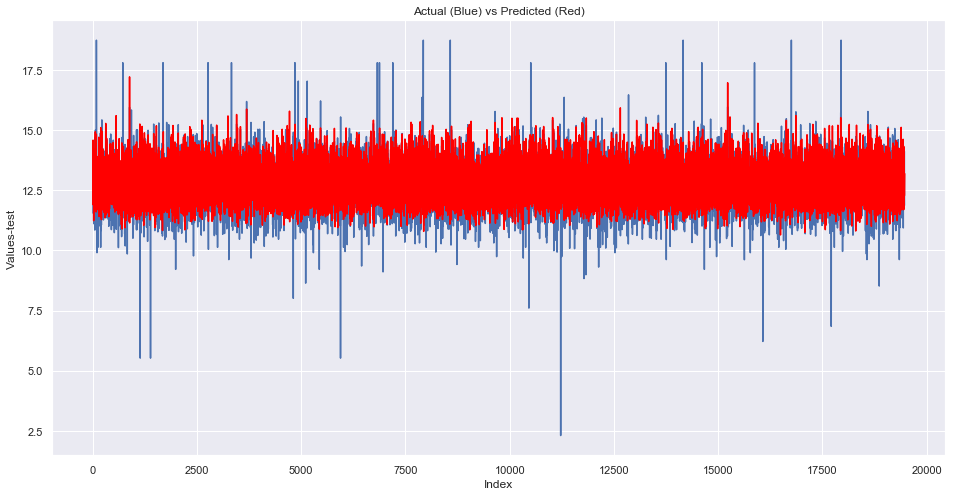

In [216]:
#Plotting the actual vs predicted values
plt.plot(nndf.index,nndf['LOGPRICE'])
plt.plot(nndf.index,nndf['PRED'], color='red')
plt.xlabel('Index')
plt.ylabel('Values-test')
plt.title('Actual (Blue) vs Predicted (Red)')
plt.show()

Text(0, 0.5, 'Predicted Q')

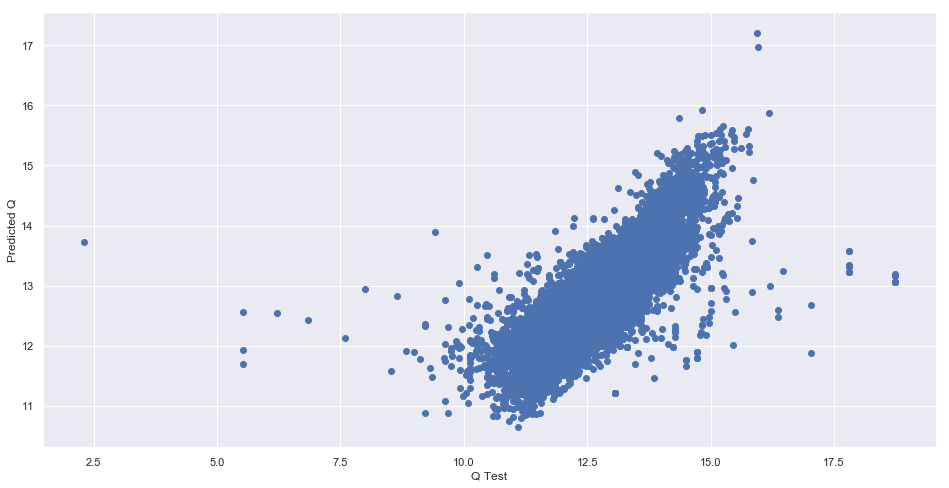

In [217]:
plt.scatter(nndf['LOGPRICE'],nndf['PRED'])
plt.xlabel('Q Test')
plt.ylabel('Predicted Q')

#### From the above built 3 models we can conclude that the relationship is significant since we got a R square value close enough to 1, result from all models which means the data is accurate and the model built works great. No assumptions are violated since there is hardly a few percent difference of the accuracy among the models hence the assumptions are perfectly fine. In the last model we didn't get warning for multi-colinearity hence it was removed as well

### <a id='4'>4. Part B - Cross Validation on Linear Regression</a>


Performing cross validation on Model 2

In [314]:
from sklearn.model_selection import KFold
H= ndf[['ASSESSMENT_NBHD','ZIPCODE','WARD','BATHRM','FIREPLACES','SALEDATE','EYB','LANDAREA','QUADRANT']]
G= ndf['LOGPRICE']
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(H) # returns the number of splitting iterations in the cross-validator
print(kf)


KFold(n_splits=5, random_state=None, shuffle=False)


In [219]:
test= list()
from sklearn.linear_model import LinearRegression
for train_index, test_index in kf.split(H):
    
    H_train, H_test = H.iloc[train_index], H.iloc[test_index]
    G_train, G_test = G.iloc[train_index], G.iloc[test_index]    
    regressor = LinearRegression()
    regressor.fit(H_train, G_train)
    G_pred = regressor.predict(H_test)
    print("TRAIN", train_index, "TEST", test_index)
    evs = np.sqrt(metrics.mean_squared_error(G_test, G_pred))
    print(evs)
    test.append(evs)
print(evs)

TRAIN [19471 19472 19473 ... 97352 97353 97354] TEST [    0     1     2 ... 19468 19469 19470]
0.519361180951541
TRAIN [    0     1     2 ... 97352 97353 97354] TEST [19471 19472 19473 ... 38939 38940 38941]
0.4610413558335854
TRAIN [    0     1     2 ... 97352 97353 97354] TEST [38942 38943 38944 ... 58410 58411 58412]
0.5974874806081271
TRAIN [    0     1     2 ... 97352 97353 97354] TEST [58413 58414 58415 ... 77881 77882 77883]
0.7222499607670616
TRAIN [    0     1     2 ... 77881 77882 77883] TEST [77884 77885 77886 ... 97352 97353 97354]
0.5163255071537457
0.5163255071537457


In [220]:
kfold_avg=np.mean(test)
kfold_avg

0.5632930970628122

#### Done the cross validation using K-Fold, and found that there was a slight change in the RMSE value , but no significant imporvement

## <a id='5'>5. Part C - Interaction effects</a>

 ###  <a id='5.1'> *Model 1:</a>  
    

In [230]:
ndf['ROOMS']=ndf['BEDRM']* ndf['BATHRM']
features = ['ASSESSMENT_NBHD','HF_BATHRM','SALE_NUM','SALEDATE','ROOMS','BEDRM','AC','BATHRM','ZIPCODE','WARD','QUALIFIED','EYB','QUADRANT','FIREPLACES']
X = ndf[features]
Y = ndf['LOGPRICE']

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(77884, 14)
(19471, 14)
(77884,)
(19471,)


In [232]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

0.32058987846293063


In [233]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LOGPRICE   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.422e+06
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:49:09   Log-Likelihood:                -85098.
No. Observations:               97355   AIC:                         1.702e+05
Df Residuals:                   97341   BIC:                         1.704e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ASSESSMENT_NBHD     0.1426      0.003     43.591      0.000       0.136       0.149
HF_BATHRM           0.1387      0.004     36.744      0.000       0.131       0.146
SALE_NUM            0.1167      0.001     86.227      0.000       0.114       0.119
SALEDATE            0.0051   7.05e-05     72.147      0.000       0.005       0.005
ROOMS              -0.0442      0.001    -43.912      0.000      -0.046      -0.042
BEDRM               0.1576      0.003     52.340      0.000       0.152       0.164
AC                  0.2329      0.005     45.374      0.000       0.223       0.243
BATHRM              0.3740      0.005     78.586      0.000       0.365       0.383
ZIPCODE             0.0785      0.003     25.799      0.000       0.073       0.084
WARD                0.2029      0.005     37.435      0.000       0.192       0.214
QUALIFIED          -0.2334      0.005    -51.205      0.000      -0.242      -0.224
EYB                 0.0003   7.24e-05      3.543      0.000       0.000       0.000
QUADRANT            0.0967      0.005     18.195      0.000       0.086       0.107
FIREPLACES          0.1056      0.003     37.079      0.000       0.100       0.111
==============================================================================
Omnibus:                    33940.680   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3224741.567
Skew:                          -0.731   Prob(JB):                         0.00
Kurtosis:                      31.157   Cond. No.                     9.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()

0.6558704406935408

### <a id='5.2'> *Model 2:</a>

In [236]:
ndf['PRICE']=ndf['BEDRM']* ndf['BATHRM']
features = ['ASSESSMENT_NBHD','SALEDATE','ZIPCODE','WARD','QUALIFIED','QUADRANT']
X = ndf[features]
Y = ndf['LOGPRICE']



In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(77884, 6)
(19471, 6)
(77884,)
(19471,)


In [238]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
pred=reg.predict(X_test)
pred=np.round_(pred)
print (mean_squared_error(Y_test,pred))

0.4849775206003983


In [239]:
m1 = sm.OLS(Y.astype(float), X.astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LOGPRICE   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.178e+06
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:17:16   Log-Likelihood:            -1.0613e+05
No. Observations:               97355   AIC:                         2.123e+05
Df Residuals:                   97349   BIC:                         2.123e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ASSESSMENT_NBHD     0.1788      0.004     44.863      0.000       0.171       0.187
SALEDATE            0.0061   5.78e-06   1054.342      0.000       0.006       0.006
ZIPCODE             0.1586      0.004     42.429      0.000       0.151       0.166
WARD                0.0976      0.007     14.752      0.000       0.085       0.111
QUALIFIED          -0.3359      0.006    -59.925      0.000      -0.347      -0.325
QUADRANT            0.0526      0.007      8.016      0.000       0.040       0.065
==============================================================================
Omnibus:                    23413.837   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496461.340
Skew:                          -0.640   Prob(JB):                         0.00
Kurtosis:                      13.989   Cond. No.                     6.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X= X_test, y= Y_test, cv = 5)
accuracy.mean()

0.4258634936623336

###  <a id='6'>6. Part E - Regularization</a>


In [222]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [315]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(P_train,Q_train)
r_pred = ridge.predict(P_test)

Text(0.5, 1.0, 'Ridge Regression - price vs Predicted price:')

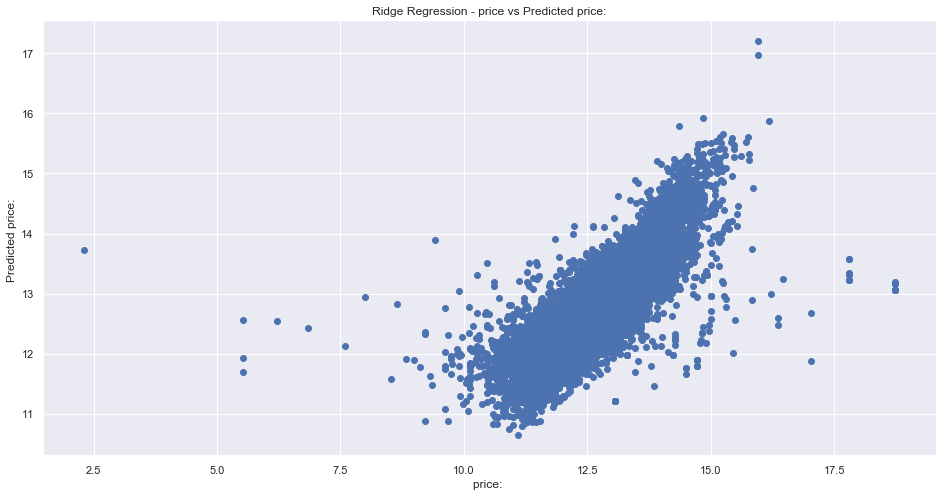

In [224]:
plt.scatter(Q_test, r_pred)
plt.xlabel("price: ")
plt.ylabel("Predicted price: ")
plt.title("Ridge Regression - price vs Predicted price:")

In [225]:
rmse_ridge = np.sqrt(metrics.mean_squared_error(Q_test, r_pred))
rmse_ridge

0.49613834348535424

In [226]:

Ridge_predicted = pd.DataFrame([])
Ridge_predicted = Ridge_predicted.append(pd.DataFrame({'Q_test':Q_test, 'Q_pred' :r_pred}), ignore_index=True)
Ridge_predicted.head()

,Q_test,Q_pred
0,13.206705,12.951187
1,12.721886,12.822573
2,12.765688,12.778403
3,13.315864,12.972226
4,12.840000,12.509054


In [227]:
#Used Ridge Regression for regularization of model
print(rmse_ridge)
print(rmse_linear)

0.49613834348535424
0.5046206836283871


In [228]:
print(ridge.score(P_train,Q_train))
print(ridge.score(P_test,Q_test))

0.63966595914444
0.6420031656650659


#### As we can see the is just slight difference in the ridge and linear regression. Thus, Regularization does not help as we can see that the rmse and the model scores are not that far apart

In [316]:
df.to_csv('DC_Properties_1.csv')  # Cleaned dataset CSV for future use in Logistics Regression

* Is the relationship significant?   
Answer:As we can see the relatioship between the predictor varibles : Rooms, Bedrooms, Bathrooms, Zipcode, Ward, Qualified and target variable : 'price' is significant.Yes, the relationship between the dependent variable 'price' and the independent variables 'Rooms' and 'Bedrooms' is significant as we have p-value of zero which shows that the slope is not zero for any random data and the model will predict the price of the house based on the input of the independent variables.


* Are any model assumptions violated?      
Answer:No Multi-collinearity between explanatory/predictor variables
The model has been assumed based on the co-relation obtained between the independent and dependent variables.
The rsme's calculated are pretty much same even when the data is split into test and train which does not show much of a difference in the R^2 value of the model which plays a crucial role in prediction.
Also, since the pvalues are 0, beta1 is never zero.

* Does the model make sense? Interpret the meaning of each independent variable.   
Answer:Yes the model makes sense in prediction of Housing price.

* Cross-validate the model. How well did it do? 
Answer:Done the cross validation using K-Fold, and found that there was a slight change in the RMSE value , but no significant imporvement

* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models? 
Answer: Yes they do so. The AIC and BIC has a larger difference in the Model 2 & 3 which predicts that they're better models and also higher the R squre value better the model.